<a href="https://colab.research.google.com/github/C-Little26/ECGR4105/blob/main/ECGR_4105_Final_Project_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print('womp womp')

womp womp


In [3]:
#necessary libraries
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/4105 Final Project/Heart Risk Combined Final Dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
heart_attack = pd.DataFrame(pd.read_csv(filepath))
heart_attack.head()

,Age,Sex,Blood Pressure,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Risk
0,40,M,140,289,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,49,F,160,180,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,37,M,130,283,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,48,F,138,214,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,54,M,150,195,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
#Defining mapping function to map multiple inputs of the dataset
def gender_map(x):
    return x.map({'M': 1, 'F': 0, 'Male' : 1, "Female" : 0, '1' : 1, '0' : 0})

def hemisphere_map(x):
    return x.map({'Southern Hemisphere' : -1, 'Northern Hemisphere' : 1})

def countries_map(x):
    return x.map({'Argentina' : -1, 'Brazil' : -1, 'China' : -1, 'Colombia' : -1,
    'India' : -1, 'Nigeria' : -1, 'South Africa' : -1, 'South Korea' : -1, 'Thailan' : -1,
    'Vietnam' : -1, 'Australia' : 1, 'Canada' : 1, 'France' : 1, 'Germany' : 1,
    'Italy' : 1, 'Japan' : 1, 'New Zealan' : 1, 'Spain' : 1, 'United Kingdom' : 1,
    'United States' : 1})

def diet_map(x):
    return x.map({'Unhealthy' : -1, 'Average' : 0, 'Healthy' : 1})

def continent_map(x):
    return x.map({'Asia' : 0, 'Africa' : 1, 'Europe' : 2, 'North America' : 3,
    'South America' : 4, 'Australia' : 5})


heart_attack['Sex'] = heart_attack[['Sex']].apply(gender_map)
heart_attack['Hemisphere'] = heart_attack[['Hemisphere']].apply(hemisphere_map)
heart_attack['Country'] = heart_attack[['Country']].apply(countries_map)
heart_attack['Diet'] = heart_attack[['Diet']].apply(diet_map)
heart_attack['Continent'] = heart_attack[['Continent']].apply(continent_map)


unique_sex = heart_attack['Sex'].unique()
print(unique_sex)
unique = heart_attack['Hemisphere'].unique()
print(unique)
unique_country = heart_attack['Country'].unique()
print(unique_country)
unique_diet = heart_attack['Diet'].unique()
print(unique_diet)
unique_continent = heart_attack['Continent'].unique()
print(unique_continent)

heart_attack.head()

[1 0]
[nan -1.  1.]
[nan -1.  1.]
[nan  0. -1.  1.]
[nan  4.  3.  2.  0.  1.  5.]


,Age,Sex,Blood Pressure,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Risk
0,40,1,140,289,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,49,0,160,180,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,37,1,130,283,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,48,0,138,214,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,54,1,150,195,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
mode_columns = ['Stress Level','Medication Use', 'Previous Heart Problems', 'Diet', 'Physical Activity Days Per Week', 'Alcohol Consumption', 'Obesity', 'Smoking',
                'Family History', 'Diabetes', 'Hemisphere', 'Continent', 'Country']

mean_columns = ['Exercise Hours Per Week', 'Sleep Hours Per Day', 'BMI', 'Sedentary Hours Per Day']

median_columns = ['Heart Rate', 'Income', 'Triglycerides']

# Fill NaN values with the mode of the column for mode_columns
for col in mode_columns:
    heart_attack[col].fillna(heart_attack[col].mode()[0], inplace=True)

# Fill NaN values with the median of the column for median_columns
for col in median_columns:
    heart_attack[col].fillna(heart_attack[col].median(), inplace=True)

# Fill NaN values with the mean of the column for mean_columns
for col in mean_columns:
    heart_attack[col].fillna(heart_attack[col].mean(), inplace=True)


unique_sex = heart_attack['Sex'].unique()
print(unique_sex)
unique = heart_attack['Hemisphere'].unique()
print(unique)
unique_country = heart_attack['Country'].unique()
print(unique_country)
unique_diet = heart_attack['Diet'].unique()
print(unique_diet)
unique_continent = heart_attack['Continent'].unique()
print(unique_continent)


# Check for NaN values in columns after fillna operations
columns_with_nulls = heart_attack.columns[heart_attack.isnull().any()].tolist()
print("Columns with NaN values after fillna operations:")
print(columns_with_nulls)

heart_attack.head()

[1 0]
[ 1. -1.]
[ 1. -1.]
[ 1.  0. -1.]
[0. 4. 3. 2. 1. 5.]
Columns with NaN values after fillna operations:
[]


,Age,Sex,Blood Pressure,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Risk
0,40,1,140,289,75.0,1.0,0.0,1.0,1.0,1.0,...,5.99369,157866.0,28.891446,417.0,3.0,7.023508,1.0,0.0,1.0,0
1,49,0,160,180,75.0,1.0,0.0,1.0,1.0,1.0,...,5.99369,157866.0,28.891446,417.0,3.0,7.023508,1.0,0.0,1.0,1
2,37,1,130,283,75.0,1.0,0.0,1.0,1.0,1.0,...,5.99369,157866.0,28.891446,417.0,3.0,7.023508,1.0,0.0,1.0,0
3,48,0,138,214,75.0,1.0,0.0,1.0,1.0,1.0,...,5.99369,157866.0,28.891446,417.0,3.0,7.023508,1.0,0.0,1.0,1
4,54,1,150,195,75.0,1.0,0.0,1.0,1.0,1.0,...,5.99369,157866.0,28.891446,417.0,3.0,7.023508,1.0,0.0,1.0,0


In [7]:
#PCA function
def reduceFeatures(x_t,x_v,K):
  pca = PCA(n_components=K)
  x_tr = pca.fit_transform(x_t)
  x_vr = pca.fit_transform(x_v)
  return x_tr, x_vr

In [8]:
X = heart_attack.iloc[:, 0:23].values
Y = heart_attack.iloc[:, 24].values

x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.fit_transform(x_val)

#y_train = y_train.reshape(-1,1)
#y_val = y_val.reshape(-1,1)

In [9]:
#determine the optimal number of components
accuracy_high = 0.0
f1_high = 0.0
accuracies = []
equals = []
precisions = []
recalls = []
f1 = []
for K in range(1,24):
  x_t, x_v = reduceFeatures(x_train,x_val,K)
  clf = SVC() #redefine classifier
  clf.fit(x_t, y_train) #fit classifier
  y_pred = clf.predict(x_v)

  accuracies.append(metrics.accuracy_score(y_val,y_pred))
  precisions.append(metrics.precision_score(y_val,y_pred))
  recalls.append(metrics.recall_score(y_val,y_pred))
  f1.append(metrics.f1_score(y_val,y_pred))
  if(metrics.accuracy_score(y_val,y_pred) > accuracy_high):
    accuracy_high = metrics.accuracy_score(y_val,y_pred)
    K_high = K
    f1_high = metrics.f1_score(y_val,y_pred)
    equals.clear()
  if(metrics.accuracy_score(y_val,y_pred) == accuracy_high):
    if(metrics.f1_score(y_val,y_pred) > f1_high): #if accuracies are even, prioritize higher f1 score
      accuracy_high = metrics.accuracy_score(y_val,y_pred)
      K_high = K
      f1_high = metrics.f1_score(y_val,y_pred)
      equals.clear()
    else:
      equals.append(K)
print("Most Accurate K value: ", K_high)
print("Accuracy:", accuracy_high)
print(equals)

Most Accurate K value:  5
Accuracy: 0.6474712068102153
[5]


In [10]:
print(accuracies)#used to check logic while running training

[0.6379569354031046, 0.6434651977966951, 0.6454682023034551, 0.6444667000500751, 0.6474712068102153, 0.6439659489233851, 0.6454682023034551, 0.642463695543315, 0.6444667000500751, 0.6434651977966951, 0.642964446670005, 0.6439659489233851, 0.6444667000500751, 0.6434651977966951, 0.6414621932899349, 0.6434651977966951, 0.6399599399098648, 0.6394591887831748, 0.6364546820230346, 0.6379569354031046, 0.642463695543315, 0.6419629444166249, 0.6414621932899349]


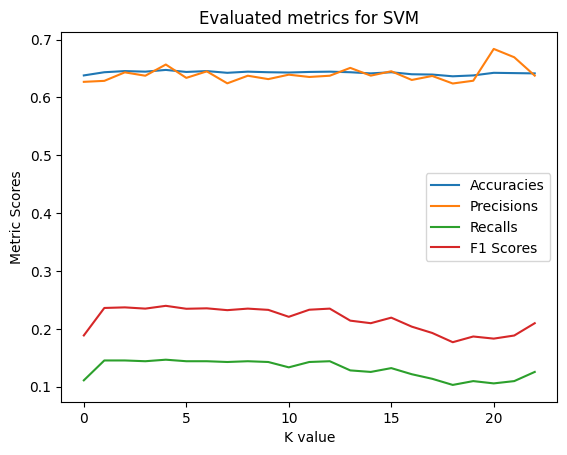

In [11]:
plt.plot(accuracies, label="Accuracies")
plt.plot(precisions, label="Precisions")
plt.plot(recalls, label="Recalls")
plt.plot(f1, label="F1 Scores")
plt.xlabel("K value")
plt.ylabel("Metric Scores")
plt.legend()
plt.title("Evaluated metrics for SVM")
plt.show()

In [12]:
#redo PCA for confusion matrix
cnf_t, cnf_v = reduceFeatures(x_train,x_val,K_high)
class_cnf = SVC() #default settings, other kernels tested later
class_cnf.fit(cnf_t, y_train)
#prepare classifier for cnf matrix
y_pred_cnf = class_cnf.predict(cnf_v)
cnfmatrix = confusion_matrix(y_val, y_pred_cnf)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_cnf))
print("Precision:",metrics.precision_score(y_val, y_pred_cnf))
print("Recall:",metrics.recall_score(y_val, y_pred_cnf))
print("F1 Score:", metrics.f1_score(y_val,y_pred_cnf))

Accuracy: 0.6449674511767651
Precision: 0.6395348837209303
Recall: 0.1453104359313078
F1 Score: 0.23681377825618946


Text(0.5, 427.9555555555555, 'Predicted label')

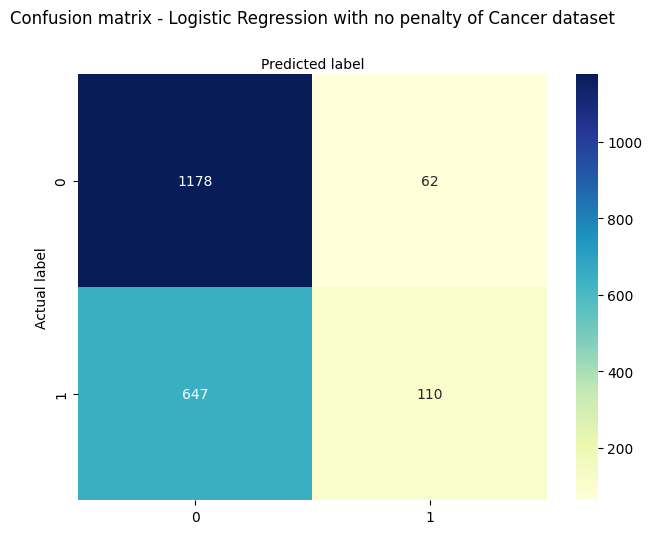

In [13]:
#draw confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sea.heatmap(pd.DataFrame(cnfmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Logistic Regression with no penalty of Cancer dataset', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
#explore various kernel tricks
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
K = K_high #use the most accurate value for K
c = 1
x_tk, x_vk = reduceFeatures(x_train,x_val,K)
svc_linear = SVC(kernel='linear',C=c)
svc_poly = SVC(kernel='poly', C=c)
svc_rbf = SVC(kernel='rbf', C=c)
svc_sigmoid = SVC(kernel='sigmoid', C=c)
svc_prec = SVC(kernel='precomputed', C=c)
svc_def = SVC()
#fit all models
svc_linear.fit(x_tk,y_train)
svc_poly.fit(x_tk,y_train)
svc_rbf.fit(x_tk,y_train)
svc_sigmoid.fit(x_tk,y_train)
svc_def.fit(x_tk,y_train)
#svc_prec.fit(x_tk,y_train)
#find predictions
yp_linear = svc_linear.predict(x_vk)
yp_poly = svc_poly.predict(x_vk)
yp_rbf = svc_rbf.predict(x_vk)
yp_sigmoid = svc_sigmoid.predict(x_vk)
yp_def = svc_def.predict(x_vk)
#yp_prec = svc_prec.predict(x_vk)
#find accuracies
acc_linear = metrics.accuracy_score(y_val, yp_linear)
acc_poly = metrics.accuracy_score(y_val, yp_poly)
acc_rbf = metrics.accuracy_score(y_val, yp_rbf)
acc_sigmoid = metrics.accuracy_score(y_val, yp_sigmoid)
acc_def = metrics.accuracy_score(y_val, yp_def)
print(acc_linear)


0.6209313970956435


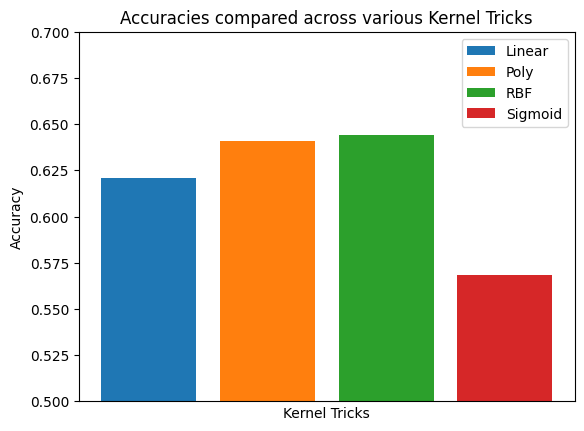

0.6439659489233851
0.6439659489233851


In [29]:

#plot accuracies against each other
plt.bar(height=acc_linear, x=1, label='Linear')
plt.bar(height=acc_poly, x=2, label='Poly')
plt.bar(height=acc_rbf, x=3, label='RBF')
plt.bar(height=acc_sigmoid, x=4, label='Sigmoid')
#plt.bar(height=acc_def, x=5, label='Default')
plt.ylim((0.5,0.7))
plt.xlabel("Kernel Tricks")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks([])
plt.title("Accuracies compared across various Kernel Tricks")
plt.show()
print(acc_rbf)
print(acc_def)

In [23]:
#redo with highest accuracy kernel
cnf_tp, cnf_vp = reduceFeatures(x_train,x_val,K_high)
class_cnf = SVC()
class_cnf.fit(cnf_tp, y_train)
#prepare classifier for cnf matrix
y_pred_cnfp = class_cnf.predict(cnf_vp)
cnfmatrix = confusion_matrix(y_val, y_pred_cnfp)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_cnfp))
print("Precision:",metrics.precision_score(y_val, y_pred_cnfp))
print("Recall:",metrics.recall_score(y_val, y_pred_cnfp))
print("F1 Score:", metrics.f1_score(y_val,y_pred_cnfp))

Accuracy: 0.6449674511767651
Precision: 0.6395348837209303
Recall: 0.1453104359313078
F1 Score: 0.23681377825618946


Text(0.5, 427.9555555555555, 'Predicted label')

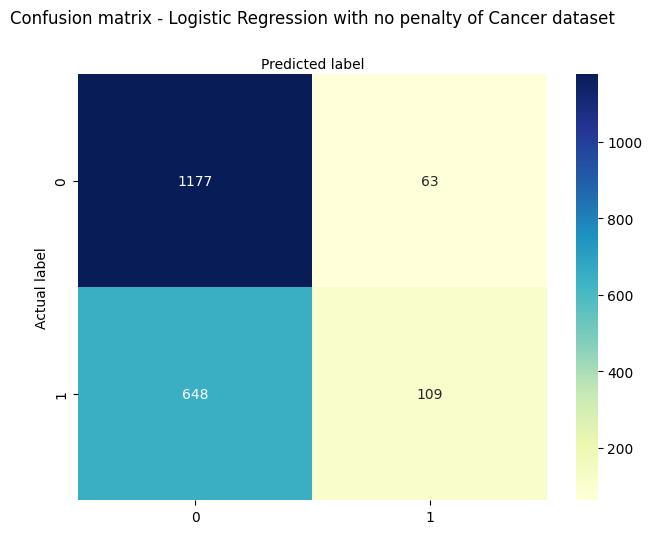

In [22]:
#draw confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sea.heatmap(pd.DataFrame(cnfmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - RBF Classification of Heart Disease ', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')